# CMP-7023B Data Mining


## Data Mining the Diabetes Mellitus Database.

### DESCRIPTION:
The main objective of this projective is to accurately classify the diabetes_mellitus status of the patient from the given
fields. The provided dataset consists of several medical predictor variables and one target variable(diabetes_mellitus). Predictor variables includes the patients age, BMI, d1_glucose_min, d1_heartrate_max so on.


### Import libraries and Dataset

In [327]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
# %matplotlib inline
# %config InlineBackend.figure_formats = ['retina']
import seaborn as sns        
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
#SEED = 42


### Importing Dataset

In [191]:
dataset = pd.read_csv("D:/Data_mining/DiabetesClassificationDataset.csv")

### Descriptive Statics

In [192]:
# Preview data
dataset.head()

,encounter_id,hospital_id,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,...,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ventilated_apache,diabetes_mellitus
0,214826,118,M,Caucasian,68.0,0,180.3,73.9,22.732803,0,...,40.0,0,0,0,0,0,0,0,0,1
1,276985,118,F,Caucasian,25.0,0,172.7,95.3,31.952749,0,...,68.0,0,0,0,0,0,0,0,0,0
2,262220,118,F,Caucasian,81.0,1,165.1,61.7,22.635548,0,...,60.0,0,0,0,0,0,0,0,1,0
3,201746,33,M,Caucasian,19.0,0,188.0,NaN,NaN,0,...,103.0,0,0,0,0,0,0,0,0,0
4,246060,81,F,Caucasian,77.0,0,160.0,70.2,27.421875,0,...,46.0,0,0,0,0,0,0,0,1,1


In [193]:
# Dataset dimensions -(rows, columns)
dataset.shape

(79159, 88)

In [194]:
# Features data-type
dataset.info()

# Statistical summary
dataset.describe().T

# Count of missing or null values
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79159 entries, 0 to 79158
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   encounter_id                 79159 non-null  int64  
 1   hospital_id                  79159 non-null  int64  
 2   gender                       79129 non-null  object 
 3   ethnicity                    78198 non-null  object 
 4   age                          76317 non-null  float64
 5   elective_surgery             79159 non-null  int64  
 6   height                       77978 non-null  float64
 7   weight                       77086 non-null  float64
 8   bmi                          76468 non-null  float64
 9   readmission_status           79159 non-null  int64  
 10  icu_type                     79159 non-null  object 
 11  h1_temp_max                  61223 non-null  float64
 12  h1_temp_min                  61223 non-null  float64
 13  d1_albumin_max  

encounter_id                      0
hospital_id                       0
gender                           30
ethnicity                       961
age                            2842
                               ... 
leukemia                          0
lymphoma                          0
solid_tumor_with_metastasis       0
ventilated_apache                 0
diabetes_mellitus                 0
Length: 88, dtype: int64

### Observations
1. The dataset contains 79159 entries(rows) and 88 columns.
2. Some columns have missing data. 
3. Each cloumn contains either of integer, Object or float dataype.
4. In the outcome column(diabetes_mellitus), patient groups (without diabetes_mellitus are represented by 0, with diabetes_mellitus are represented by 1).


### Data statics Visulization

<AxesSubplot:xlabel='diabetes_mellitus', ylabel='count'>

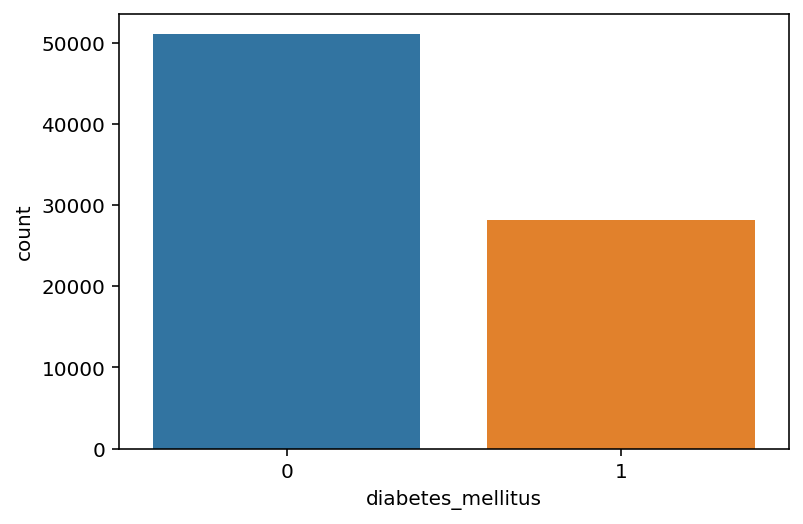

In [328]:
# outcome(diabetes_mellitus) countplot
sns.countplot(x = 'diabetes_mellitus',data = dataset)

<AxesSubplot:>

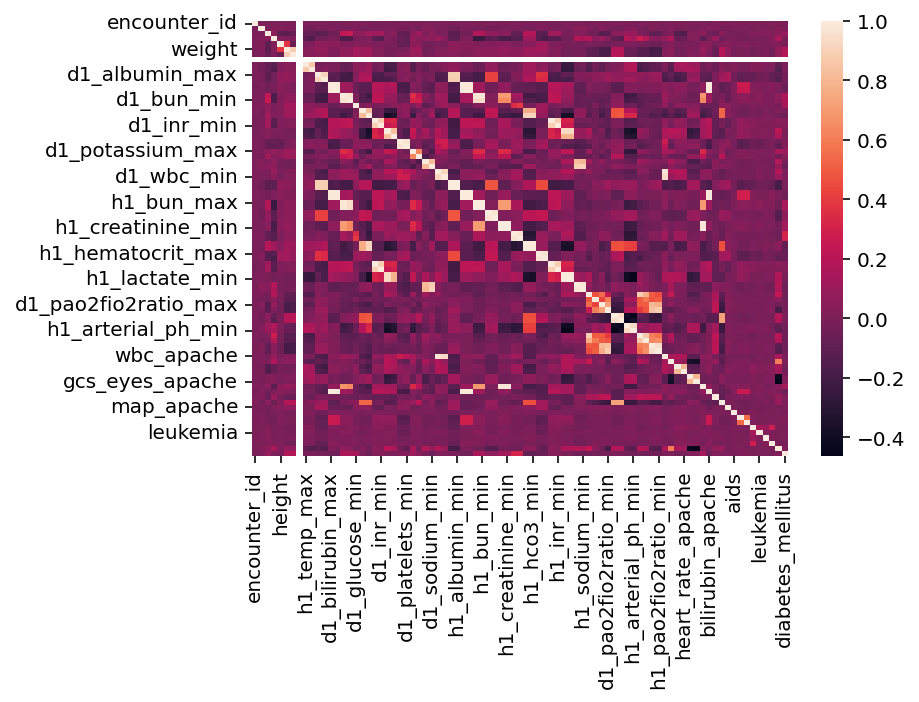

In [329]:
#Heatmap
sns.heatmap(dataset.corr())

# Data Cleaning/ Preprocessing

### Removing Columns from the dataset that have missing values more than fifty five percent.

In [197]:
null_percent = dataset.isnull().sum()/dataset.shape[0]*100
null_percent
col_to_drop = null_percent[null_percent>55].keys()
dff = dataset.drop(col_to_drop, axis=1)  # dff is newdataset after removing null values from the columns

ddff = dff.drop(['icu_type','encounter_id','hospital_id','ventilated_apache','intubated_apache'], axis=1) # Removing few unnecessary columns 
ddff.shape
ddff.shape

(79159, 41)

### Label Encoding  for handling categorical variables in ETHNICITY AND GENDER COLUMN.

In [343]:
# importing the implementation of this algorihm from sklearn  .
from sklearn.preprocessing import LabelEncoder  

# creating instance of labelencoder.
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
ddff['ethnicity'] = labelencoder.fit_transform(ddff['ethnicity'])
ddff['gender'] = labelencoder.fit_transform(ddff['gender'])
ddff

,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,2,68.0,0,180.3,73.900000,22.732803,0,39.500000,37.500000,...,100.000000,40.0,0,0,0,0,0,0,0,1
1,0,2,25.0,0,172.7,95.300000,31.952749,0,36.700000,36.700000,...,98.000000,68.0,0,0,0,0,0,0,0,0
2,0,2,81.0,1,165.1,61.700000,22.635548,0,35.600000,34.800000,...,100.000000,60.0,0,0,0,0,0,0,0,0
3,1,2,19.0,0,188.0,85.114552,29.600786,0,36.721315,36.612966,...,100.000000,103.0,0,0,0,0,0,0,0,0
4,0,2,77.0,0,160.0,70.200000,27.421875,0,36.300000,36.300000,...,95.000000,46.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79154,0,2,86.0,0,167.6,86.200000,30.687339,0,36.700000,36.700000,...,94.000000,137.0,0,0,0,0,0,0,0,0
79155,0,2,55.0,0,165.1,91.700000,33.641487,0,36.600000,36.600000,...,100.000000,59.0,0,0,0,1,0,0,1,0
79156,1,0,61.0,0,173.0,88.100000,29.436333,0,36.800000,36.800000,...,100.000000,173.0,0,0,0,0,0,0,0,0
79157,1,2,80.0,0,175.0,84.800000,27.689796,0,36.721315,36.612966,...,98.110251,54.0,0,0,0,1,0,0,0,0


### Imputation - Replacing missing values with the mean value of the entire feature column.

In [199]:
ddff["age"].fillna(ddff["age"].mean(), inplace = True)
ddff["height"].fillna(ddff["height"].mean(), inplace = True)
ddff["weight"].fillna(ddff["weight"].mean(), inplace = True)
ddff["bmi"].fillna(ddff["bmi"].mean(), inplace = True)

ddff["h1_temp_max"].fillna(ddff["h1_temp_max"].mean(), inplace = True)
ddff["h1_temp_min"].fillna(ddff["h1_temp_min"].mean(), inplace = True)
ddff["d1_bun_max"].fillna(ddff["d1_bun_max"].mean(), inplace = True)
ddff["d1_bun_min"].fillna(ddff["d1_bun_min"].mean(), inplace = True)

ddff["d1_glucose_min"].fillna(ddff["d1_glucose_min"].mean(), inplace = True)
ddff["d1_hco3_max"].fillna(ddff["d1_hco3_max"].mean(), inplace = True)
ddff["d1_hco3_min"].fillna(ddff["d1_hco3_min"].mean(), inplace = True)
ddff["d1_platelets_max"].fillna(ddff["d1_platelets_max"].mean(), inplace = True)
ddff["d1_platelets_min"].fillna(ddff["d1_platelets_min"].mean(), inplace = True)
ddff["d1_potassium_max"].fillna(ddff["d1_potassium_max"].mean(), inplace = True)
ddff["d1_potassium_min"].fillna(ddff["d1_potassium_min"].mean(), inplace = True)
ddff["d1_sodium_max"].fillna(ddff["d1_sodium_max"].mean(), inplace = True)

ddff["d1_sodium_min"].fillna(ddff["d1_sodium_min"].mean(), inplace = True)
ddff["d1_wbc_max"].fillna(ddff["d1_wbc_max"].mean(), inplace = True)
ddff["d1_wbc_min"].fillna(ddff["d1_wbc_min"].mean(), inplace = True)
ddff["wbc_apache"].fillna(ddff["wbc_apache"].mean(), inplace = True)

ddff["d1_heartrate_max"].fillna(ddff["d1_heartrate_max"].mean(), inplace = True)
ddff["heart_rate_apache"].fillna(ddff["heart_rate_apache"].mean(), inplace = True)
ddff["gcs_motor_apache"].fillna(ddff["gcs_motor_apache"].mean(), inplace = True)
ddff["gcs_eyes_apache"].fillna(ddff["gcs_eyes_apache"].mean(), inplace = True)

ddff["creatinine_apache"].fillna(ddff["creatinine_apache"].mean(), inplace = True)
ddff["h1_spo2_max"].fillna(ddff["h1_spo2_max"].mean(), inplace = True)
ddff["map_apache"].fillna(ddff["map_apache"].mean(), inplace = True)
ddff["d1_albumin_max"].fillna(ddff["d1_albumin_max"].mean(), inplace = True)
ddff["d1_albumin_min"].fillna(ddff["d1_albumin_min"].mean(), inplace = True)


### OUTLIERS DETECTION USING IsolationForest

In [200]:
#importing the implementation of this algorihm from sklearn  
from sklearn.ensemble import IsolationForest


clf = IsolationForest(max_samples=31258, random_state = 1, contamination= 0.01)
preds = clf.fit_predict(ddff)


totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("The Total number of outliers identified are: ",totalOutliers)

The Total number of outliers identified are:  792


### REMOVING OUTLIERS DATASET

In [170]:
# selecting all rows that are not outliers and creating a boolean mask    

mask = preds != -1

#Apply mask to X and check shape 
X2=ddff[mask]
print(X2.shape)


(78367, 41)


### NORMALIZING the dataset using MIN-MAX SCALER

In [222]:
#importing the implementation of this algorihm from sklearn  
    from sklearn.preprocessing import MinMaxScaler            

# create a scaler object
scaler = MinMaxScaler()

# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(ddff), columns=ddff.columns)

#Display the normalized dataset
df_norm

,gender,ethnicity,age,elective_surgery,height,weight,bmi,readmission_status,h1_temp_max,h1_temp_min,...,h1_spo2_max,map_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,0.5,0.333333,0.764045,0.0,0.738140,0.239484,0.148912,0.0,1.000000,0.718750,...,1.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.333333,0.280899,0.0,0.607981,0.384668,0.322972,0.0,0.540984,0.593750,...,0.980000,0.17500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.333333,0.910112,1.0,0.477822,0.156716,0.147076,0.0,0.360656,0.296875,...,1.000000,0.12500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.333333,0.213483,0.0,0.870012,0.315567,0.278570,0.0,0.544478,0.580151,...,1.000000,0.39375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.333333,0.865169,0.0,0.390478,0.214383,0.237435,0.0,0.475410,0.531250,...,0.950000,0.03750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79154,0.0,0.333333,0.966292,0.0,0.520637,0.322931,0.299082,0.0,0.540984,0.593750,...,0.940000,0.60625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79155,0.0,0.333333,0.617978,0.0,0.477822,0.360244,0.354853,0.0,0.524590,0.578125,...,1.000000,0.11875,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
79156,0.5,0.000000,0.685393,0.0,0.613119,0.335821,0.275465,0.0,0.557377,0.609375,...,1.000000,0.83125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79157,0.5,0.333333,0.898876,0.0,0.647371,0.313433,0.242493,0.0,0.544478,0.580151,...,0.981103,0.08750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### CORRELATION MATRIX.

In [284]:
correlatin_matrix = df_norm.corr().abs()
print(correlatin_matrix)

                               gender  ethnicity       age  elective_surgery  \
gender                       1.000000   0.028982  0.023774          0.022420   
ethnicity                    0.028982   1.000000  0.018222          0.021698   
age                          0.023774   0.018222  1.000000          0.056432   
elective_surgery             0.022420   0.021698  0.056432          1.000000   
height                       0.669336   0.051321  0.100323          0.019683   
weight                       0.231403   0.043649  0.111881          0.020999   
bmi                          0.052612   0.025124  0.074066          0.010382   
readmission_status                NaN        NaN       NaN               NaN   
h1_temp_max                  0.001438   0.013656  0.065642          0.104364   
h1_temp_min                  0.000643   0.013380  0.068684          0.141002   
d1_albumin_max               0.045849   0.006215  0.076229          0.016533   
d1_albumin_min               0.043392   

In [285]:
ut = correlatin_matrix.where(np.triu(np.ones(correlatin_matrix.shape),k=1).astype(np.bool))
print(ut)

                             gender  ethnicity       age  elective_surgery  \
gender                          NaN   0.028982  0.023774          0.022420   
ethnicity                       NaN        NaN  0.018222          0.021698   
age                             NaN        NaN       NaN          0.056432   
elective_surgery                NaN        NaN       NaN               NaN   
height                          NaN        NaN       NaN               NaN   
weight                          NaN        NaN       NaN               NaN   
bmi                             NaN        NaN       NaN               NaN   
readmission_status              NaN        NaN       NaN               NaN   
h1_temp_max                     NaN        NaN       NaN               NaN   
h1_temp_min                     NaN        NaN       NaN               NaN   
d1_albumin_max                  NaN        NaN       NaN               NaN   
d1_albumin_min                  NaN        NaN       NaN        

In [286]:
to_drop = [column for column in ut.columns if any(ut[column] > 0.90)]
print(); print(to_drop)


['d1_albumin_min', 'd1_bun_min', 'd1_platelets_min', 'd1_wbc_min', 'wbc_apache']


### Assign X equal to the new dataset excluding outcome(diabetes_mellitus) and droped columns

In [288]:
X= df_norm[['gender', 'ethnicity', 'age', 'elective_surgery', 'height', 'weight',
       'bmi', 'readmission_status', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 'd1_bun_max',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max', 'd1_potassium_max', 'd1_potassium_min',
       'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis']]

In [289]:
Y = df_norm.diabetes_mellitus
Y.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: diabetes_mellitus, dtype: float64

In [290]:
#Selecting features
X, Y = df_norm.drop('diabetes_mellitus', axis=1), df_norm['diabetes_mellitus']
print(X.shape, Y.shape)

(79159, 40) (79159,)


### Splitting the X and Y for train & Test

In [291]:
from sklearn.model_selection import train_test_split
train_X,test_X, train_y, test_y= train_test_split (X,Y, test_size=0.2,random_state=1)

### Applying Random Forest Classifier and displaying the top features.

Text(0.5, 1.0, 'Top Features derived by Random Forest')

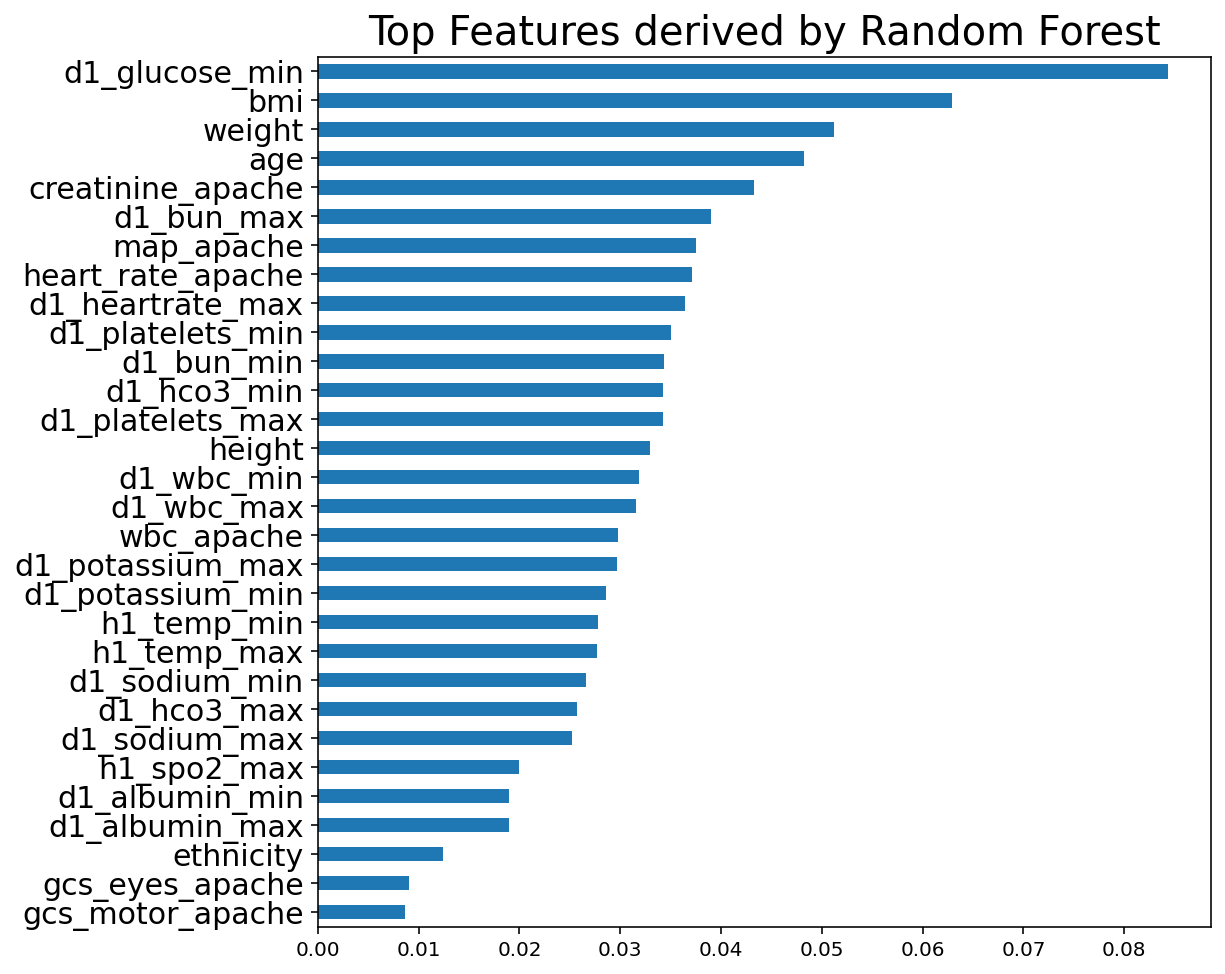

In [330]:
rfc = RandomForestClassifier(random_state=42, n_estimators=100)

# Train model, note that NO scaling is required
rfc_model = rfc.fit(train_X, train_y)

# Plot the top features based on its importance
(pd.Series(rfc_model.feature_importances_, index=X.columns)
    .nlargest(30)   # can adjust based on how many top features you want
    .plot(kind='barh', figsize=[8,8])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)


### Checking dimensions

In [295]:
print("X_train shape:", train_X.shape)
print("X_test shape:", test_X.shape)
print("Y_train shape:", train_y.shape)
print("Y_test shape:", test_y.shape)

X_train shape: (63327, 40)
X_test shape: (15832, 40)
Y_train shape: (63327,)
Y_test shape: (15832,)


In [301]:
train_y.value_counts() 

0.0    40893
1.0    22434
Name: diabetes_mellitus, dtype: int64

### Resampling usign library resample

In [297]:
#importing the library resample
from sklearn.utils import resample

#contatenating our training data back together.  
resampling = train_X.copy()
resampling['diabetes_mellitus']= train_y.values

# separate minority and majority classes
majority_class = resampling[resampling['diabetes_mellitus']==0]
minority_class = resampling[resampling['diabetes_mellitus']==1]
# minority_class.shape
# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True,     # sample with replacement
                                 n_samples=40893,     # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority_class, minority_upsampled])

# Show dataset statistics
print(upsampled.describe())
 
# Display new class counts
upsampled.diabetes_mellitus.value_counts()

             gender     ethnicity           age  elective_surgery  \
count  81786.000000  81786.000000  81786.000000      81786.000000   
mean       0.271917      0.334613      0.706865          0.186328   
std        0.249346      0.182635      0.177709          0.389373   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.333333      0.606742          0.000000   
50%        0.500000      0.333333      0.719101          0.000000   
75%        0.500000      0.333333      0.842697          0.000000   
max        1.000000      1.000000      1.000000          1.000000   

             height        weight           bmi  readmission_status  \
count  81786.000000  81786.000000  81786.000000             81786.0   
mean       0.554407      0.324293      0.286997                 0.0   
std        0.183596      0.173506      0.160712                 0.0   
min        0.000000      0.000000      0.000000                 0.0   
25%        0.434321    

0.0    40893
1.0    40893
Name: diabetes_mellitus, dtype: int64

### Displaying the unsampled columns

In [298]:
upsampled.columns

Index(['gender', 'ethnicity', 'age', 'elective_surgery', 'height', 'weight',
       'bmi', 'readmission_status', 'h1_temp_max', 'h1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bun_max', 'd1_bun_min',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max',
       'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min',
       'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min',
       'wbc_apache', 'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object')

In [299]:
#Designate the continuous input features as X
upsampled_X=upsampled[['gender', 'ethnicity', 'age', 'elective_surgery', 'height', 'weight',
       'bmi', 'readmission_status', 'h1_temp_max', 'h1_temp_min',
       'd1_albumin_max', 'd1_albumin_min', 'd1_bun_max', 'd1_bun_min',
       'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max',
       'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min',
       'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min',
       'wbc_apache', 'd1_heartrate_max', 'heart_rate_apache',
       'gcs_motor_apache', 'gcs_eyes_apache', 'creatinine_apache',
       'h1_spo2_max', 'map_apache', 'aids', 'cirrhosis', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis']]
print(upsampled_X.head())
print("Shape of training data:",upsampled_X.shape,"\n")

#Designate the outcome or target variable as y
upsampled_y = upsampled.diabetes_mellitus
print(upsampled_y.head())
print("Shape of training data:",upsampled_y.shape,"\n")

       gender  ethnicity       age  elective_surgery    height    weight  \
49701     0.5   0.333333  0.775281               0.0  0.868299  0.276798   
32212     0.0   0.333333  0.898876               1.0  0.767255  0.321574   
44146     0.0   0.333333  0.764045               0.0  0.607981  0.291995   
40268     0.5   0.333333  0.674157               0.0  0.607981  0.111262   
73106     0.5   0.333333  0.393258               0.0  0.870012  0.443012   

            bmi  readmission_status  h1_temp_max  h1_temp_min  ...  \
49701  0.144306                 0.0     0.754098     0.796875  ...   
32212  0.209894                 0.0     0.590164     0.640625  ...   
44146  0.236507                 0.0     0.573770     0.625000  ...   
40268  0.067884                 0.0     0.606557     0.656250  ...   
73106  0.274719                 0.0     0.606557     0.593750  ...   

       creatinine_apache  h1_spo2_max  map_apache  aids  cirrhosis  \
49701           0.078125         0.99     0.05000   

## Data Modeling

In [300]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(upsampled_X, upsampled_y)
Y_pred_knn = knn.predict(test_X)
accuracy_knn = accuracy_score(test_y, Y_pred_knn)
print("K Nearest neighbors: " + str(accuracy_knn * 100))


K Nearest neighbors: 64.73597776654876


In [304]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(upsampled_X, upsampled_y)
Y_pred_ranfor = ranfor.predict(test_X)
accuracy_ranfor = accuracy_score(test_y, Y_pred_ranfor)
print("Random Forest: " + str(accuracy_ranfor * 100))
Y_pred_ranfor

Random Forest: 67.91940373926225


array([0., 0., 0., ..., 0., 0., 0.])

In [325]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(upsampled_X, upsampled_y)
Y_pred_dectree = dectree.predict(test_X)
accuracy_dectree = accuracy_score(test_y, Y_pred_dectree)
print("Decision tree: " + str(accuracy_dectree * 100))

Decision tree: 62.076806467913094


In [306]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(upsampled_X, upsampled_y)
Y_pred_svc = svc.predict(test_X)
accuracy_svc = accuracy_score(test_y, Y_pred_svc)
print("Support Vector Classifier: " + str(accuracy_svc * 100))

Support Vector Classifier: 65.50656897422941


In [317]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(upsampled_X, upsampled_y)
Y_pred_nb = nb.predict(test_X)
accuracy_nb = accuracy_score(test_y, Y_pred_svc)
print("# Naive Bayes: " + str(accuracy_nb * 100))

# Naive Bayes: 65.50656897422941


In [318]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(upsampled_X, upsampled_y)
Y_pred_logreg = logreg.predict(test_X)
accuracy_logreg = accuracy_score(test_y, Y_pred_logreg)
print("Logistic Regression neighbors: " + str(accuracy_logreg * 100))

Logistic Regression neighbors: 64.45174330469933


In [319]:
# Making predictions on test dataset 
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

## Model Evaluation

In [321]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [320]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 64.45174330469933
K Nearest neighbors: 64.73597776654876
Support Vector Classifier: 65.50656897422941
Naive Bayes: 65.50656897422941
Decision tree: 62.076806467913094
Random Forest: 67.91940373926225


## From the above test set accuracies, Random forest algorithm is able to achieve the highest accuracy of 67.91%.

In [322]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, Y_pred_ranfor)
cm

array([[6913, 3201],
       [3918, 1800]], dtype=int64)

<AxesSubplot:>

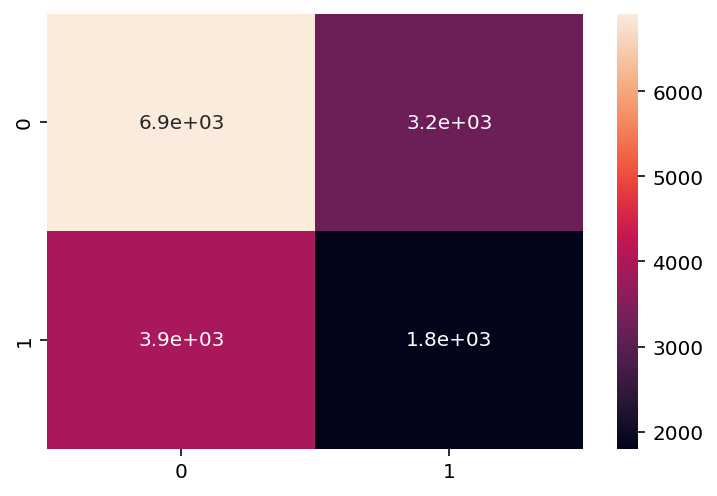

In [323]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [324]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(test_y, Y_pred_ranfor))

              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66     10114
         1.0       0.36      0.31      0.34      5718

    accuracy                           0.55     15832
   macro avg       0.50      0.50      0.50     15832
weighted avg       0.54      0.55      0.54     15832



### Thank You.